## Movie Recommendation System

#### A recommender system aims to suggest relevant content or products to users that might be liked or purchased by them. It helps to find items that the user is looking for — and they don’t even realize it until the recommendation is displayed. Different strategies have to be applied for different clients and they are determined by available data

### There are two main techniques used in recommendation system, known as content-based filtering and collaborative filtering

##### Content Based :
Content-based filtering uses item features to recommend other items similar to what the user likes, based on their previous actions or explicit feedback.For example, if user A watched two horror movies, another horror movie will be proposed to him.
#### Collaborative Filtering :
To address some of the limitations of content-based filtering, collaborative filtering uses similarities between users and items simultaneously to provide recommendations. Collaborative filtering models can recommend an item to user A based on the interests of a similar user B. Main advantage is that they learn users’ embeddings automatically, without the need for hand-engineering.

### Importing Libraries & Datasets

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from skimage import io

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

### Initial Analysis

In [2]:
df = pd.read_csv('/Users/thennarasuanbazhagan/Desktop/movies.csv')
df.drop('imdb_id',axis = 1, inplace =True)
df.head()

,id,title,genres,original_language,overview,popularity,production_companies,release_date,budget,revenue,runtime,status,tagline,vote_average,vote_count,credits,keywords,poster_path,backdrop_path,recommendations
0,414906,The Batman,Crime-Mystery-Thriller,en,In his second year of fighting crime Batman un...,8195.597,6th & Idaho-Dylan Clark Productions-DC Films-W...,3/1/22,185000000,759793000,176.0,Released,Unmask the truth.,7.8,4165,Robert Pattinson-Zoë Kravitz-Paul Dano-Jeffrey...,crime fighter-secret identity-nightclub-politi...,/74xTEgt7R36Fpooo50r9T25onhq.jpg,/tRS6jvPM9qPrrnx2KRp3ew96Yot.jpg,335787-508947-696806-777270-833425-718032-5050...
1,634649,Spider-Man: No Way Home,Action-Adventure-Science Fiction,en,Peter Parker is unmasked and no longer able to...,4716.995,Marvel Studios-Pascal Pictures-Columbia Pictures,12/15/21,200000000,1892000000,148.0,Released,The Multiverse unleashed.,8.1,12300,Tom Holland-Zendaya-Benedict Cumberbatch-Jacob...,new york city-loss of loved one-showdown-secre...,/1g0dhYtq4irTY1GPXvft6k4YLjm.jpg,/iQFcwSGbZXMkeyKrxbPnwnRo5fl.jpg,646380-624860-568124-524434-580489-425909-4766...
2,799876,The Outfit,Drama-Thriller-Crime,en,Leonard is an English tailor who used to craft...,2752.077,Focus Features-FilmNation Entertainment-Unifie...,2/25/22,0,3186865,105.0,Released,Everyone has something up their sleeve.,7.0,161,Mark Rylance-Zoey Deutch-Dylan O'Brien-Johnny ...,chicago illinois-murder-organized crime-mobste...,/ieOVuwnoFC49m7bekmdQ4AynciS.jpg,/2n95p9isIi1LYTscTcGytlI4zYd.jpg,294793-760104-628900-606402-406759-811631-8799...
3,508947,Turning Red,Animation-Family-Comedy-Fantasy,en,Thirteen-year-old Mei is experiencing the awkw...,3513.967,Walt Disney Pictures-Pixar,3/10/22,190000000,13428061,100.0,Released,Growing up is a beast.,7.4,1980,Rosalie Chiang-Sandra Oh-Ava Morse-Hyein Park-...,canada-shapeshifting-temple-toronto canada-con...,/qsdjk9oAKSQMWs0Vt5Pyfh6O4GZ.jpg,/fOy2Jurz9k6RnJnMUMRDAgBwru2.jpg,696806-414906-691683-787752-511809-619979-8334...
4,675353,Sonic the Hedgehog 2,Action-Science Fiction-Comedy-Family,en,After settling in Green Hills Sonic is eager t...,4056.245,SEGA-Original Film-Blur Studios-Marza Animatio...,3/30/22,110000000,323000000,122.0,Released,Welcome to the next level.,7.6,786,Ben Schwartz-Idris Elba-Colleen O'Shaughnessey...,sequel-based on video game-hedgehog-live actio...,/6DrHO1jr3qVrViUO6s6kFiAGM7.jpg,/egoyMDLqCxzjnSrWOz50uLlJWmD.jpg,526896-338953-676705-763285-629542-752623-4067...


### How big is data?



In [3]:
df.shape

(299889, 20)

### What is the data type of cols?


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299889 entries, 0 to 299888
Data columns (total 20 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    299889 non-null  int64  
 1   title                 299888 non-null  object 
 2   genres                262088 non-null  object 
 3   original_language     299889 non-null  object 
 4   overview              280589 non-null  object 
 5   popularity            299889 non-null  float64
 6   production_companies  201904 non-null  object 
 7   release_date          296036 non-null  object 
 8   budget                299889 non-null  int64  
 9   revenue               299889 non-null  int64  
 10  runtime               291346 non-null  float64
 11  status                299889 non-null  object 
 12  tagline               81319 non-null   object 
 13  vote_average          299889 non-null  float64
 14  vote_count            299889 non-null  int64  
 15  

### Are there any missing values?


In [5]:
df.isnull().sum()

id                           0
title                        1
genres                   37801
original_language            0
overview                 19300
popularity                   0
production_companies     97985
release_date              3853
budget                       0
revenue                      0
runtime                   8543
status                       0
tagline                 218570
vote_average                 0
vote_count                   0
credits                  34950
keywords                151449
poster_path              49095
backdrop_path           138658
recommendations         243017
dtype: int64

### Are there duplicate values?


In [6]:
df.duplicated().sum()

69729

### Lets get rid of the duplicate values
 

In [7]:
df.drop_duplicates(inplace=True)

### Let's check if there are any movies with same title

In [8]:
df['title'].duplicated().sum()

38418

#### Hmm! there are 38418 movies with same title. Now these might be duplicate movies but there's possibility that some might be different movies with same title thats why Let's check if there are any movies with same title and same release date

In [9]:
df[['title','release_date']].duplicated().sum()

17909

### Lets get rid of the duplicate movies


In [10]:
df.drop_duplicates(subset=['title','release_date'], inplace=True)

In [11]:
df.shape

(212251, 20)

In [12]:
def lammitization():
    import nltk
    nltk.download('punkt')
    nltk.download('averaged_perceptron_tagger')
    nltk.download('wordnet')
    from nltk.corpus import wordnet, stopwords
    from nltk.stem import WordNetLemmatizer
    from nltk.tokenize import word_tokenize
    df['overview']= df['overview'].fillna('')

    # Tokenizing the data base texts.

    df['overview']=df['overview'].str.lower().apply(word_tokenize).apply(nltk.tag.pos_tag) # Applying part of speech tags.


    # Converting part of speeches to wordnet format.

    def get_wordnet_pos(tag):
        if tag.startswith('J'):
            return wordnet.ADJ
        elif tag.startswith('V'):
            return wordnet.VERB
        elif tag.startswith('N'):
            return wordnet.NOUN
        elif tag.startswith('R'):
            return wordnet.ADV
        else:
            return wordnet.NOUN


    df['overview']= df['overview'].apply(lambda x: [(word, get_wordnet_pos(pos_tag)) for (word, pos_tag) in x])

    # Applying word lemmatizer.

    wnl = WordNetLemmatizer()

    df['overview']= df['overview'].apply(lambda x: [wnl.lemmatize(word, tag) for word, tag in x])


    df['overview']= df['overview'].apply(lambda x: ' '.join(x))

### Feature Derivation 

#### We will compute pairwise similarity scores for all movies based on their overview and recommend movies based on that similarity score.

For any of you who has done even a bit of text processing before knows we need to convert the word vector of each overview. Now we'll compute Term Frequency-Inverse Document Frequency (TF-IDF) vectors for each overview.

Now if you are wondering what is term frequency , it is the relative frequency of a word in a document and is given as (term instances/total instances). Inverse Document Frequency is the relative count of documents containing the term is given as log(number of documents/documents with term) The overall importance of each word to the documents in which they appear is equal to TF * IDF

This will give you a matrix where each column represents a word in the overview vocabulary (all the words that appear in at least one document) and each row represents a movie, as before.This is done to reduce the importance of words that occur frequently in plot overviews and therefore, their significance in computing the final similarity score.

Fortunately, scikit-learn gives you a built-in TfIdfVectorizer class that produces the TF-IDF matrix in a couple of lines. That's great, isn't it?

In [13]:
df.drop_duplicates(inplace=True, ignore_index=True)
#df = df.groupby('title').first().reset_index()
df.fillna(value={i: ' ' for i in ['overview', 'genres', 'keywords', 'credits']}, inplace=True)

# lambda func for str split join
strOp= lambda x: ' '.join(x.split('-'))

df.overview = df.overview + df.keywords.apply(strOp) + df.genres.apply(strOp) + df.credits.apply(lambda x: ' '.join(x.replace(' ', '').split('-')[:3]))
 
#Define a TF-IDF Vectorizer Object. Remove all english stop words such as 'the', 'a'
tfidf = TfidfVectorizer(stop_words='english')

#Construct the required TF-IDF matrix by fitting and transforming the data
tfidf_matrix = tfidf.fit_transform(df['overview'])

display(pd.DataFrame(
    tfidf_matrix[:10, 7000:7070].toarray(),
    columns= tfidf.get_feature_names_out()[7000:7070],
    index = df.title[:10]).round())

print(tfidf_matrix.shape)

,actionmatthewwillig,actionmatthewwolf,actionmatthiasschoenaerts,actionmattmccolm,actionmattmccoy,actionmattmitler,actionmattmullins,actionmattryan,actionmaudadams,actionmauramonti,...,actionmichaelbrandon,actionmichaelbrianrawlins,actionmichaelbugard,actionmichaelcaine,actionmichaelcera,actionmichaelchan,actionmichaelchiesa,actionmichaelchowman,actionmichaeldemesa,actionmichaeldudikoff
title,,,,,,,,,,,,,,,,,,,,,
The Batman,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Spider-Man: No Way Home,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
The Outfit,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Turning Red,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Sonic the Hedgehog 2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Yaksha: Ruthless Operations,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Moonfall,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Uncharted,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
All the Old Knives,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


(212251, 460261)


### Finally The Recommender System

In [14]:
# Function that takes in movie title as input and outputs most similar movies
def get_recommendations(title):
    # Get the index of the movie that matches the title
    idx = df.index[df['title'] == title][0]
    # show given movie poster
    try:
        a = io.imread(f'https://image.tmdb.org/t/p/w500/{df.loc[idx, "poster_path"]}')
        plt.imshow(a)
        plt.axis('off')
        plt.title(title)
        plt.show()
    except:pass
    
    print('Recommendations\n')


    # Get the pairwsie similarity scores of all movies with that movie
    sim_scores = list(enumerate(
        cosine_similarity(
            tfidf_matrix,
            tfidf_matrix[idx])))

    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar movies
    sim_scores = sim_scores[1:10]

    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar movies
    result = df.iloc[movie_indices]
    
    # show reco. movie posters
    fig, ax = plt.subplots(3, 3, figsize=(15,20))
    ax=ax.flatten()
    for i, j in enumerate(result.poster_path):
        try:
            ax[i].axis('off')
            ax[i].set_title(result.iloc[i].title,fontsize=22)
            a = io.imread(f'https://image.tmdb.org/t/p/w500/{j}')
            ax[i].imshow(a)
        except: pass
    fig.tight_layout()
    fig.show()

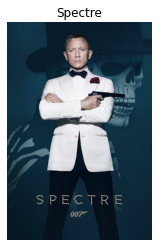

Recommendations



/var/folders/74/f1wcwdvn5sxdtw5bkxh43hmw0000gn/T/ipykernel_5508/4011947556.py:46: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


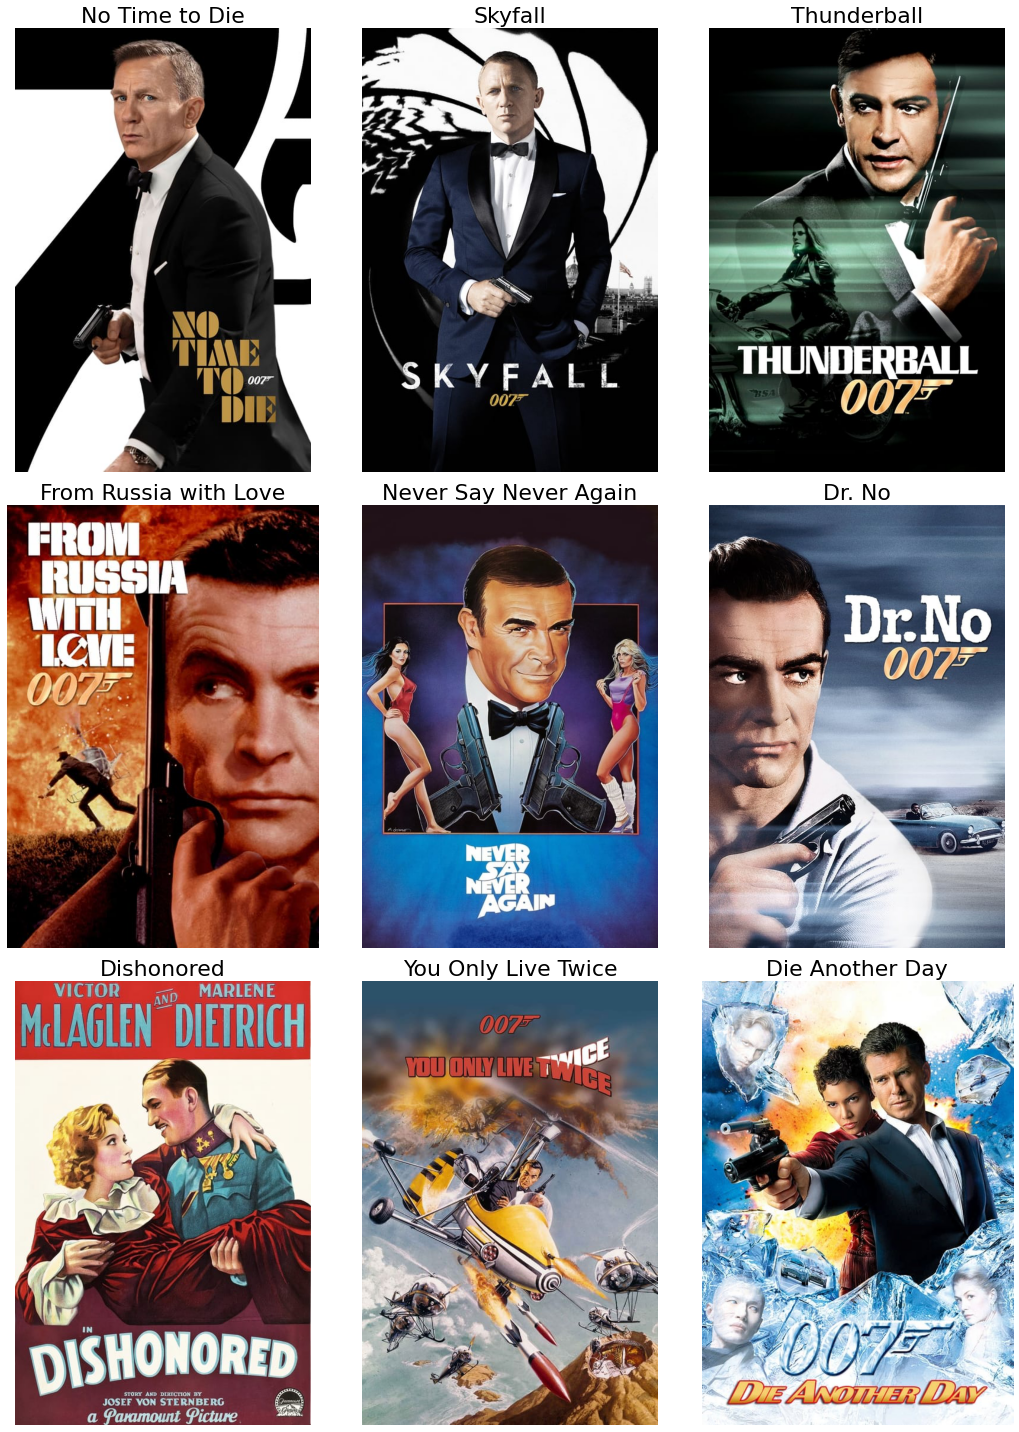

In [15]:
get_recommendations("Spectre")

#### Conclusion
This basic recommender system seems to be doing a decent job at recommending similar movies.
There is a major drawback with this model which is it will not work with any movie title which is not present in the dataset or if the spelling does not match.
To overcome this issue, we can provide the users with a list of available titles to get the recommendations.